In [1]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import KernelPCA, PCA, TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/kathy/Downloads/winequality-red.csv")

In [3]:
df.info()
#The provided output is the summary information of the dataset, including the number of rows (12), 
#the data types of each column, and the number of non-null values for each feature. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
column_names = df.columns
for column in column_names:
    missing_values = df[column].isnull().sum()
    data_balance = len(df) - missing_values
    print(f"Column '{column}' - Data Balance: {data_balance}/{len(df)}")
    
    #having a complete dataset without missing values simplifies data analysis and modeling

Column 'fixed acidity' - Data Balance: 1599/1599
Column 'volatile acidity' - Data Balance: 1599/1599
Column 'citric acid' - Data Balance: 1599/1599
Column 'residual sugar' - Data Balance: 1599/1599
Column 'chlorides' - Data Balance: 1599/1599
Column 'free sulfur dioxide' - Data Balance: 1599/1599
Column 'total sulfur dioxide' - Data Balance: 1599/1599
Column 'density' - Data Balance: 1599/1599
Column 'pH' - Data Balance: 1599/1599
Column 'sulphates' - Data Balance: 1599/1599
Column 'alcohol' - Data Balance: 1599/1599
Column 'quality' - Data Balance: 1599/1599


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
#statistical measures to know our data better
descriptive_stats = df.describe()
print(descriptive_stats)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

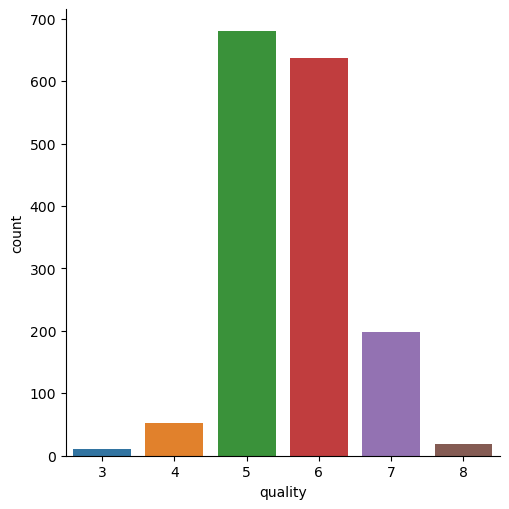

In [8]:
sns.catplot(x='quality',data=df,kind='count')
#6 quality of values 
#plotting the count of data points for each category of the 'quality' variable 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

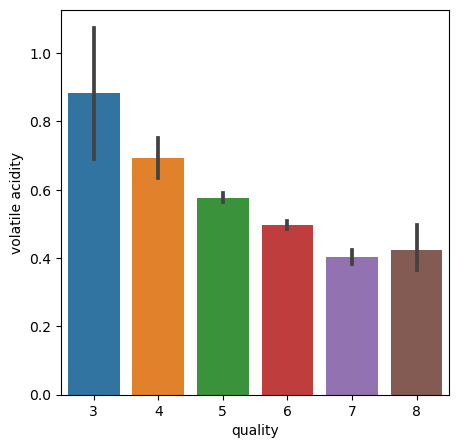

In [9]:
# which chemical parameter is related to our quality, give one example
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

In [10]:
### what is the corelation of my data?
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [11]:
correlation = df.corr()

<AxesSubplot:>

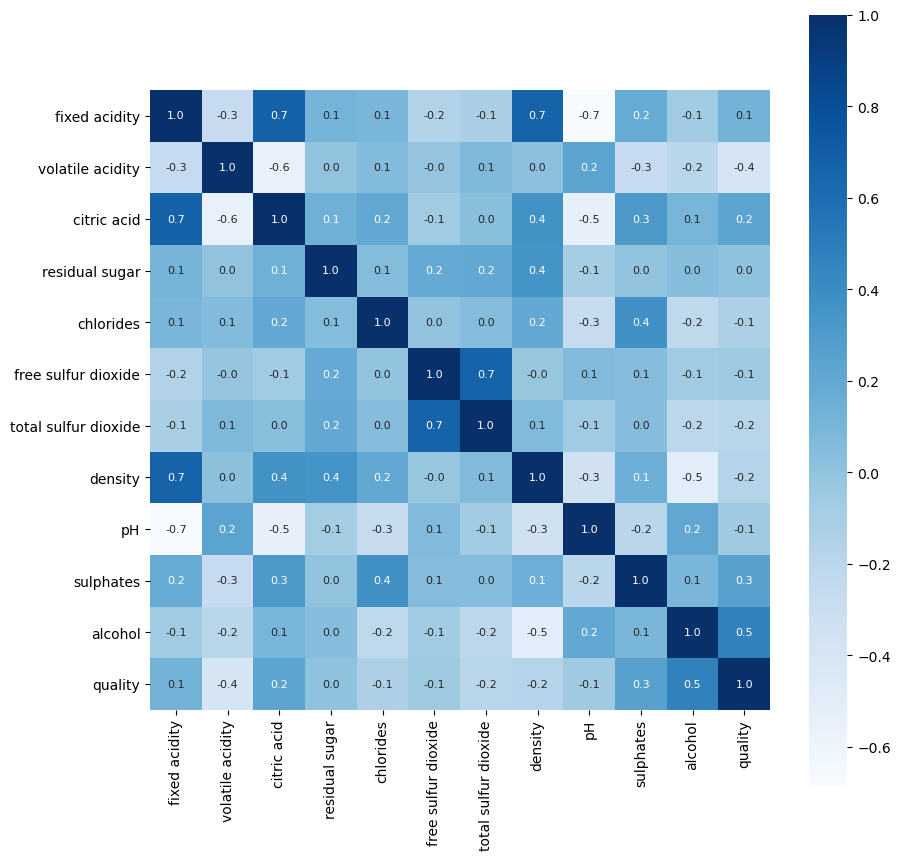

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [14]:
#label binarization  label binarization  transform multi-class classification problems into binary subproblems,
#making it possible to use binary classification algorithms and facilitating model evaluation and compatibility with existing machine learning libraries.
X = df.drop('quality', axis=1)
y = df['quality'].apply(lambda y_value:1 if y_value>= 7 else 0)

In [15]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#You can then use the X_train and y_train datasets to train your machine learning model 
#and the X_test dataset to evaluate the model's performance

In [17]:
#optional using the SimpleImputer class to fill in the missing value with the mean strategy for both training and test data
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
#By using StandardScaler, you are making sure that both the training and testing data have been scaled consistently. It is crucial to apply the same scaling to both sets 
#to avoid introducing any data leakage or inconsistency between the training and testing processes.

In [19]:
print("Training data shape:", X_train.shape, y_train.shape)
print("test data shape:", X_test.shape, y_test.shape)

Training data shape: (1279, 11) (1279,)
test data shape: (320, 11) (320,)


In [20]:
#Apply PCA 

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
X_train =pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [22]:
pca.explained_variance_ratio_

array([0.9479048])

In [25]:
#model training 
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
#Accuracy score method using test data
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print(test_data_accuracy)

0.8375


In [46]:
#building predictive system 
import numpy as np
data=('0.7','0','1.9','0.076','11','34','0.9978','3.51','0.56','9.4',
5)
data_numpy=np.asarray(data)
data_numpy_reshape=(data_numpy.reshape(1,-1))
prediction=model.predict(data_numpy_reshape)
print(prediction)


[0]


C:\Users\kathy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\kathy\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [29]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\kathy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[230  61]
 [ 46 216]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       291
           1       0.78      0.82      0.80       262

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



In [34]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       291
           1       0.87      0.89      0.88       262

    accuracy                           0.89       553
   macro avg       0.89      0.89      0.89       553
weighted avg       0.89      0.89      0.89       553



In [35]:
#the Support Vector Classifier (SVC) is  find an optimal hyperplane that  maximizes the generalization performance. 
from sklearn import svm

In [36]:
svm=svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [37]:
y_pred2 = svm.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred2)

0.7269439421338155

In [39]:
from sklearn.neighbors import KNeighborsClassifier


In [40]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)

C:\Users\kathy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
accuracy_score(y_test,y_pred3)

0.8462929475587704

In [47]:
#save the model 

In [68]:
X = df.drop('quality',axis=1)
y=df['quality']

In [64]:
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)

In [65]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = pca.fit_transform(X)

In [66]:
X = pca.fit_transform(X)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_res,y_res)

RandomForestClassifier()

In [70]:
import joblib # efficiently saving and loading Python objects

In [71]:
joblib.dump(rf,'wine quality_prediction')

['wine quality_prediction']

In [ ]:
joblib.load()